<a href="https://colab.research.google.com/github/blazingbhavneek/scratch_ml/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib
import matplotlib.pyplot as plt

In [2]:
x, y = datasets.make_regression(n_samples=100, n_features=3, n_targets=2, noise=10, random_state=42)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [3]:
class LinearRegression:
  def __init__(self, lr=0.0001, epochs=10000):
    self.lr=lr
    self.epochs=epochs
    self.weights=None
    self.bias=None

  def fit(self, x, y):
    # print(x.shape)
    # print(y.shape)
    self.weights = np.random.rand(x.shape[1], y.shape[1])
    self.bias = np.random.rand(1, y.shape[1])

    y_hat = np.matmul(x, self.weights)+self.bias
    diff = y_hat-y

    for e in range(self.epochs):
      dw=np.zeros((x.shape[1], y.shape[1]))
      db=np.zeros(self.bias.shape)
      for i in range(x.shape[0]):
        # print(x[i].shape)
        # print(diff[i].shape)
        dw+=np.outer(x[i], diff[i])
        db+=diff[i]
      dw/=x.shape[0]
      db/=x.shape[0]
      self.weights-=self.lr*dw
      self.bias-=self.lr*db

  def predict(self, x, y):
    y_hat = np.matmul(x, self.weights)+self.bias
    diff = y_hat-y
    diff=np.square(np.sum(diff, axis=0))
    diff/=x.shape[0]
    diff=np.sqrt(diff)
    for i in range(diff.shape[0]):
      print("RMSE for", i, "th feature is: ", diff[i])
    return y_hat

In [4]:
model = LinearRegression()

In [5]:
model.fit(x_train, y_train)

In [6]:
y_hat = model.predict(x_test, y_test)

RMSE for 0 th feature is:  60.88741357333224
RMSE for 1 th feature is:  53.101604079005426


In [7]:
y_hat_full = model.predict(x, y)

RMSE for 0 th feature is:  38.32981181412049
RMSE for 1 th feature is:  75.59784007292973


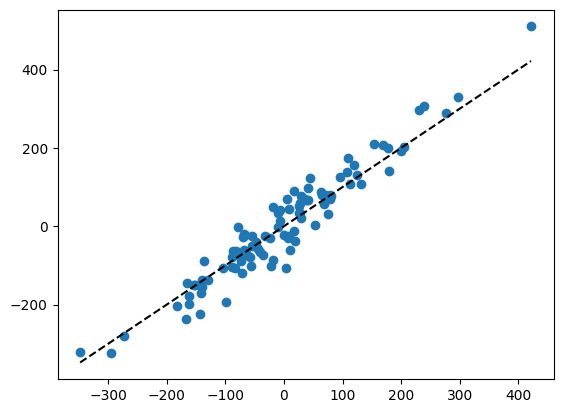

In [11]:
y_plot = y[:, 0]
plt.figure()
plt.scatter(y_plot, y_hat_full[:, 0])
plt.plot([min(y_plot), max(y_plot)], [min(y_plot), max(y_plot)], linestyle='--', color='k', label='y=x')
plt.show()

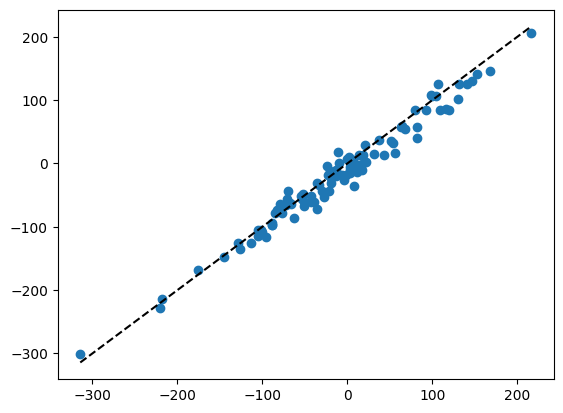

In [12]:
y_plot = y[:, 1]
plt.figure()
plt.scatter(y_plot, y_hat_full[:, 1])
plt.plot([min(y_plot), max(y_plot)], [min(y_plot), max(y_plot)], linestyle='--', color='k', label='y=x')
plt.show()